<a href="https://colab.research.google.com/github/cristian2024/RSA/blob/master/rsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AlgoritmoRsa para envio de mensajes**

En criptografía, RSA (Rivest, Shamir y Adleman) es un sistema criptográfico de clave pública desarrollado en 1979. Es el primer y más utilizado algoritmo de este tipo y es válido tanto para cifrar como para firmar digitalmente.

La seguridad de este algoritmo radica en el problema de la factorización de números enteros. Los mensajes enviados se representan mediante números, y el funcionamiento se basa en el producto, conocido, de dos números primos grandes elegidos al azar y mantenidos en secreto. Actualmente estos primos son del orden de $10^{300}$ , y se prevé que su tamaño siempre crezca con el aumento de la capacidad de cálculo de los ordenadores.

Como en todo sistema de clave pública, cada usuario posee dos claves de cifrado: una pública y otra privada. Cuando se quiere enviar un mensaje, el emisor busca la clave pública del receptor, cifra su mensaje con esa clave, y una vez que el mensaje cifrado llega al receptor, este se ocupa de descifrarlo usando su clave privada.

Se cree que RSA será seguro mientras no se conozcan formas rápidas de descomponer un número grande en producto de primos. Aunque se cree que la computación cuántica podría proveer de una solución al problema de factorización, existen investigadores que dudan que dichos avances vayan a volver obsoletos estos algoritmos. [1]






**Funciones necesarias**

para el funcionamiento correcto del algoritmo, se deben codificador distintas funciones, entre ellas se encuentran:


*   Algoritmo extendido de euclides
*   Inversa modular
*   Conversores:
  * de entero a caracter
  * de caracter a int


**Algorimo extendido de euclides**

el algoritmo extendido de euclides es una ampliacion del algoritmo de euclides que nos permite encontar los valores 'x' y 'y' de la siguiente ecuacion:

mcd(a,b)= a(x)+b(y)

donde a > = b

Si no se cumple la desigualdad anterior, la misma funcion los ordenara internamente y mostrara los valores en orden de  mayor a menor

Dado que los valores a y b deben estar ordenados, se precisa de una funcion que complete este trabajo:

In [ ]:
def max_min(a,b):
    if a > b:
        return [a, b]
    return [b,a]


def alg_euclides_extendido(a, b):

    #primero se ordenan los dos valores del mayor al menor#
    ord = max_min(a,b)

    #los primeros datos en los arreglos siempre seran los mismos#
    pri=[ord[0],0,1,0]
    seg=[ord[1],ord[0]//ord[1],0,1]


    #se necesitan modificar los datos de ambos arreglos, uno a la vez
    # val sirve para definir a cual de los dos modificar
    val=True

    #Cuando alguno de los arreglos llegue a cero en la primera posicion,
    # se acabo la ejecucion#
    while pri[0]!=0 and seg[0]!=0:
        if val:
            pri[0] = pri[0] % seg[0]
            pri[2] = pri[2] - (seg[1] * seg[2])
            pri[3] = pri[3] - (seg[1] * seg[3])

            #debemos asegurarnos de no dividir por cero
            if pri[0] != 0 and seg[0] != 0:
                pri[1]=(seg[0] // pri[0])

            #se modifica la variable val para que ahora modifique el otro


            val = False
        else:
            seg[0] = seg[0] % pri[0]
            seg[2] = seg[2] - (pri[1] * pri[2])
            seg[3] = seg[3] - (pri[1] * pri[3])


            if seg[0] != 0 and pri[0] != 0:
                seg[1]=(pri[0] // seg[0])


            val = True

    if val:
        return [pri[0],pri[2],pri[3]]
    else:
        return [seg[0],seg[2],seg[3]]

# si bien el algoritmo extendido de euclides puede hacer el calculo del mcd, es menos eficiente ya que ademas de este calcula otros valores, si no son necesarios en la operacion
# a realizar, es preferible usar la version especifica del mcd, tambien conocido como "algoritmo de euclides"

print(alg_euclides_extendido(17,13))
print(alg_euclides_extendido(102,400))


[1, -3, 4]
[2, -13, 51]


El anterior algorimtmo implementa una solucion tipo tabla que se explica en la siguiente figura:
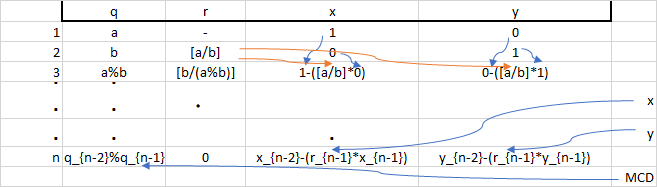

**Nota** : la primera posicion es el maximo comun divisor, la segunda es el valor de x y la tercera es el valor de y


**Inversa Modular**

Dado $n\in Z_p$, se define la inversa modular de n,($n^{-1}$)  de la siguiente manera:

$$nn^{-1} \cong 1mod(p)$$

n tendra inversa si se cumple la siguiente condicion:

* $Mcd(n,p)=1$

El valor de la inversa $n^{-1}$ sera la variable que acompana al valor p al solucionar la ecuacion $Mcd(n,p)=y(n)+x(p)$, y esta misma es resuelta con el algoritmo extendido de euclides

Nota: si el valor de la inversa es negativo, se le suma el valor de p


In [ ]:
def inversa(n,mod):
    ord=alg_euclides_extendido(n,mod)
    if ord[0]==1:
        if ord[2]<0:
            return ord[2]+mod
        return ord[2]
    return 0

**Conversores**

Los mensajes en tipo caracter deben ser pasados a valores numericos y viceversa dependiendo de como sean necesarios, para ello se implementaron las funciones que convierten de un lado al otro

**de caracter a entero**

In [ ]:
def int_char(char):
    c=ord(char)
    if 65<=c<=90:
        return c-64
    elif 97<=c<=122:
        return c-96
    return 0

print(int_char('a'))
print(int_char('A'))
print(int_char('z'))

1
1
26


**de entrero a caracter**

In [ ]:
def char_int(int):
    if int==0:
        return '.'
    return chr(int+96)

print(char_int(1))
print(char_int(26))

a
z


cabe recalcar que en esta implementacion, solo se leen los caracteres pertenecientes al abecedario, cualquier otro lo convierte en un punto, y la mayuscula se convierte en minuscula

**Otras funciones**

las siguientes funciones son usadas para un funcionamiento correcto y no necesitan mayor explicacion:

**LLaves publica y privada**

Las llaves publica y privada son un conjunto de numeros que se usan para encriptar y desencriptar el mensaje en cuestion.

Dados los valores $p,q$, ambos siendo numeros primos (preferiblemente primos grandes), se definen:
$$Φ(p,q)=(p-1)(q-1)$$
$$n(p,q)=p*q$$

**Llave publica**

la llave publica son un conjunto de dos numeros $e,n$ los cuales se usan para operar con el mensaje y encriptarlo, donde:

* $e\in Z_Φ$, $e$ posee inversa multiplicativa modular, es decir, $\forall Z_Φ \exists e^{-1} | ee^{-1}\cong 1(mod Φ)$

Nota: es mas confiable tomar a $e$ como un numero primo no divisor de $Φ$, esto con el fin de generar una mejor encriptacion

In [ ]:
import random
#si bien el mcd de dos numeros se puede calcular con el algoritmo extendido de euclides...
#esta implementacion esta mas pensada para solo el mcd evitando el resto de valores
def mcd(a,b):
    if b==0:
        return a
    else:
        return mcd(b,a%b)


#este par de funciones sirven para calcular primos de manera aleatoria
def is_primo(a):
    if a%2==0:
        return False
    for i in range(3,a//2,2):
        if a%i==0:
            return False
    return True

def get_primo(fro_m):
    i=random.randrange(fro_m,1000)
    while True:
        if is_primo(i):
            return i
        i=i+1
#valor de Φ
def fi(a,b):
    return (a-1)*(b-1)

#aqui se busca algun valor que cumpla las propiedades ya mencionadas de el valor 'e'
def val_e(n):
    #se itera 
    while True:
        i=get_primo(20)
        if mcd(i,n)==1:
            return i

#calculo del 'n' mencionado anteriormente
def val_n(p,q):
    return p*q

#aqui se calcula todo junto y se imprimen los valores
def get_publica(p,q):
    n=val_n(p,q)
    fi_1=fi(p,q)
    e=val_e(fi_1)
    return [e,n]

# ya que el valor de 'e' se toma aleatoriamente, este no sera el mismo en cada ejecucion
p=89
q=97

llave_pub=get_publica(p,q)
print(llave_p)


#cabe recalcar que p y q tambien pueden calcularse aleatoriamente para mayor seguridad

[503, 8633]


**Llave privada**

funciona de manera inversa a la llave publica, con los valores de la llave, se desencriptan los valores encriptados por la llave publica.

la llave publica es un conjunto de dos numeros $d,n$, los cuales cumplen las siguiente condicion:
* $d=e^{-1}$, osea $d$ es la inversa multiplicativa del $e$ que se usa en la llave privada, y ademas ambos comparten el mismo $n$

In [ ]:
def get_privada(e,p,q):
    d=inversa(e,fi(p,q))
    n=val_n(p,q)
    return [d,val_n(p,q)]

e=llave_pub[0]
llave_priv=get_privada(e,p,q)
print(llave_priv)

[3143, 8633]


Nota: dado que $d$ es la inversa de $e$, se debe pasar a la funcion el valor de $e$, esto a razon de que $e$ se calcula de manera aleatoria

Para comprobar que el valor $d$ calculado en el anterior algorimo este funcionando correctamente, se puede calcular la inversa de $d$, la cual deberia ser igual a $e$

In [ ]:
e_1=inversa(llave_priv[0],fi(p,q))
e=llave_pub[0]
print(e_1)
print(e)

887
887


**Encriptar y desencriptar**



---
**Encriptar**

Dados $e,n$, la llave publica, y un mensaje $m$, para encriptar $m$, primero se debe asignar un valor numerico a cada caracter

Ejemplo: 'c'=3

luego, por cada valor de cada caracter en el mensaje, se debe hacer la siguiente operacion, como ejemplo, se toma 'c'=3:

$3^{e}mod(n)$.

Pero dado que e no siempre es un numero pequeno, una operacion asi de grande tardaria mucho tiempo, o de paso no seria completada, para solucionar esto, se hace uso de un algoritmo que calcula el valor de exponentes muy grandes $mod (n)$

$algoritmo:$

dado $a^r mod(b)$, la notacion $n_i$ como el digito del numero r en la posicion i, y bin(n) como la operacion que pasa un numero decimal a binario, $a,n,r,b \in Z$, tenemos:

n=bin(r)
t=digitos de n


$\forall_{i=1}^{t} \{acum=acum*(a^{2^{i-1}}mod(b))$,  nada en cualquier otro caso

acum=acum mod(b)

In [ ]:
def encriptar(mensaje,e,n):
    bi=str(bin(e))[2:]
    j=[]
    for i in range(len(mensaje)):
        acum=1
        h=0
        for k in reversed(range(len(bi))):
            if bi[k] == '1':
               acum=acum*(int_char(mensaje[i])**(2**h)%n)
            h=h+1
        j.append(acum%n)
    return j

**Desencriptar**

se repite el mismo proceso que al encriptar, pero ahora en vez de usar a $e$, se usa a $e^{-1}=d$, y se calcula su valor caracter.

Ejemplo: 3='c'

In [ ]:
def desencriptar(mensaje,d,n):
    bi=str(bin(d))[2:]
    j=[]
    for i in range(len(mensaje)):
        acum=1
        h=0
        for k in reversed(range(len(bi))):
            if bi[k]=='1':
                acum=acum*(mensaje[i]**(2**h)%n)
            h=h+1
        j.append(char_int(acum%n))
    return "".join(j)

**Pruebas de funcionamiento**

Ya solo hace falta probar el algoritmo, para ello calculamos una llave publica y una llave privada y luego encriptamos un mensaje, como ya se especifico en la conversion, lo que no pertenezca al alfabeton sera convertido a un punto

In [ ]:
publica=get_publica(p,q)
e=publica[0]
n=publica[1]

privada=get_privada(e,p,q)
d=privada[0]

enc=encriptar("hola mundo",e,n)
print(enc)

des=desencriptar(enc,d,n)
print(des)

[4644, 1274, 5036, 1, 0, 7678, 910, 2238, 4050, 1274]
hola.mundo


**Bibliografia**

[1] : https://es.wikipedia.org/wiki/RSA#cite_note-1


https://juncotic.com/rsa-como-funciona-este-algoritmo/